In [2]:
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (10, 6)
kwargs = dict(alpha=0.5, bins=50)

# Population versus Sample

## Populating our Country

We start by genereating our population of 1 million inhabitants. We want to look at different theoretical distributions:
- For the normal distribution we take body height as an example. The people of our country have an average height of 176 cm with a standard deviation of 6 cm.
- For the uniform distribution all our inhabiants throw a six sided die an remember the result.
- For the exponential we assume an average waiting time for the next messenger message of 4 minutes.

Note that we only use NumPy, which makes operations extremely fast and memory overhead small. NumPy also offers plenty of functionality for statistics so there is no need to use more elaborate constructs like Pandas. 

We can easily populate our country on a simple laptop with a few lines of NumPy code.

In [3]:
population_size = 1000000

population_normal = np.random.normal(loc=176, scale=6, size=population_size)

population_uniform = np.random.choice(6, size=population_size) + 1

population_exp = np.random.exponential(4, size=population_size)

## Looking at our Country

After we populate our country we can easily look at the whole population, We can even do censuses in no time at all and so get the real population parameters for mean and variance. Note that this is practically impossible when talking about actual populations in reality. Typically it is both too much effort and takes too much time to do a full census. That is why we need statistics after all.

Note that although we have a sizeable population of a million people the parameter means in our population are not exactly what we specified when randomly generating our population. The random generator gave us these deviations. The world is not perfect, even not inside a computer,

In [4]:
print("Population Mean (normal): %.10f / Population Variance (normal): %.10f" % 
      (np.mean(population_normal), np.var(population_normal)))

print("Population Mean (uniform): %.10f / Population Variance (uniform): %.10f" % 
      (np.mean(population_uniform), np.var(population_uniform)))

print("Population Mean (exponential): %.10f / Population Variance (exponential): %.10f" % 
      (np.mean(population_exp), np.var(population_exp)))

Population Mean (normal): 175.9958811866 / Population Variance (normal): 35.9853336906
Population Mean (uniform): 3.5007650000 / Population Variance (uniform): 2.9122894148
Population Mean (exponential): 4.0040003364 / Population Variance (exponential): 16.0352492152


## A lot of Statistics

Now we are starting to actually do statistics. Instead of looking at the whole population we take samples. This is the more realistic process to get information about large populations as opposed to walking from door to door and askine 1.000.000 people.

The most important thing to understand is that each sample is a random experiment. Ideally sample are completely random to avoid any biases. In our random experiments this is the case. In real life examples this is more the exception. Except for poentially introducing bias if not done carefully it does not really matter: Every sample is a random experiment.

### Designing the Experiment

Goal of our experiments is not so much getting population statistics but mainly to understand the whole process. Since we have extremely efficient means to get information about our artificial population we can do a lot of experiments.

For a starter we will be using three different sample sizes: 10, 100 and 1.000 people of our population. Note that even the largest sample are only 1% of the population saving us 99% of the effort. Since we want to understand how good our random samples statistically represent our population we will not only ask one sample but 1.000 samples of each sample size.

In real life we typically take only one sample. This could be any one of our one thousand samples. If we look at the distribution of our 1.000 samples we can get a hint of the probability to choose certain samples with a certain result of our statistics.

### Implementing the Experiment

Idea was to use relatively simple construchts in Python It is also only a notebook for playing around with the concepts. Refactoring the code using functions and reducing copy and paste reuse in the notebook would be a worthwhile exercise which I didn't do.

After setting the number of experiments and the sample sizes we pack all we know about our population in a list caleed distributions. To store the results of our experiements we prepare NumPy arrays with enough space to hold the results of all our experiments. We need 3 distributions times 3 sample sizes NumPy arrays. For now we are interested in the mean and the variance of our random experiments.

After all this preparation it is just a set of nested for loops doing all the work. The nice thing about using NumPy again is that the code is really fast since we can do all the hard work by just calling NumPy functions.

In [17]:
no_experiments = 1000
sample_sizes = [10, 100, 1000]
distributions = [population_normal, population_uniform, population_exp]
sample_means = [[np.zeros(no_experiments), np.zeros(no_experiments), np.zeros(no_experiments)],
                [np.zeros(no_experiments), np.zeros(no_experiments), np.zeros(no_experiments)],
                [np.zeros(no_experiments), np.zeros(no_experiments), np.zeros(no_experiments)]]
sample_variances = [[np.zeros(no_experiments), np.zeros(no_experiments), np.zeros(no_experiments)],
                    [np.zeros(no_experiments), np.zeros(no_experiments), np.zeros(no_experiments)],
                    [np.zeros(no_experiments), np.zeros(no_experiments), np.zeros(no_experiments)]]

s=0
for sample_size in sample_sizes:
    d=0
    for distro in distributions:
        for i in range(no_experiments):
            sample_normal = np.random.choice(distro, sample_size)
            sample_means[s][d][i] = np.mean(sample_normal)
#            sample_variances[s][d][i] = np.var(sample_normal, ddof=1)
            sample_variances[s][d][i] = np.var(sample_normal)
        d = d+1
    s = s+1

## Evaluating the Results

After doing quite a lot of random experiments we want to look at the results. We use Matplotlib for that which perfectly works on our NumPy data structures. Remember thet we on purpose took three different distributions for our population parameters. Let's see what statistics we get on our population on mean and variances.

### Mean of a Normal Distribution

The first one we are looking at is the height of our population. We populated our country with 1.000.000 oeople with an average height of 176 cm and a standard deviation of 6 cm. But now we are looking at the results our 1.000 random experiments spread over 50 bins in a historgram. We look at the histograms for all sample sizes.

We eaily see that our results are roughly normally distributed. This has nothing to do with the fact that height is also normally distributed in our population. As we will soon see our random experiments will always be normally distributed. So drawing random samples from a normally or otherwise distributed  population will typically give us results normally distributed around or statistical value.

Looking at the three sample sizes there are some more noteworthy observations:
- The histogram bins will always add up to out 1.000 experiments. So we always see all experiments in the histogram.
- The larger the sample size the more our histogram approaches a normal distribution.
- The larger the sample size the narrower our experiments are to the population mean.
- Since the scale of the x-axis is absolute and the resuts of of the experiments with larger sample sizes are not that spread out the bins are also smaller.

Again we see that sampling 1% of our population gives us very exact results regarding the population mean. Practically all experiments are within 1 cm of the actual population mean. As the normal distribution is not only very common but also mathematically well understood you can calculate how many of your experiments are expected to be in a certain interval. We wont do any math here, just experiment using Python and NumPy.

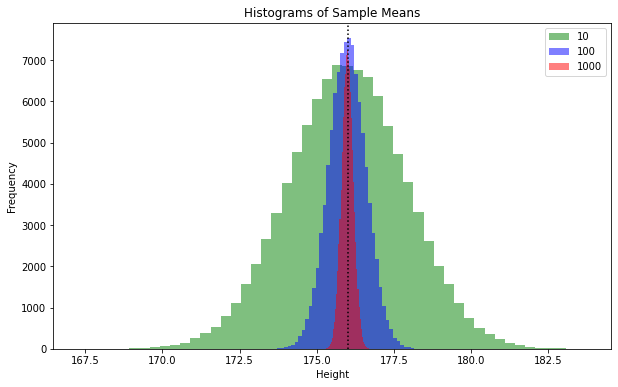

In [14]:
fig, ax = plt.subplots(1, 1)
plt.hist(sample_means[0][0], **kwargs, color='g', label=sample_sizes[0])
plt.hist(sample_means[1][0], **kwargs, color='b', label=sample_sizes[1])
plt.hist(sample_means[2][0], **kwargs, color='r', label=sample_sizes[2])
plt.vlines(176, 0, 1, transform=ax.get_xaxis_transform(), linestyles ="dotted", colors ="k")
plt.gca().set(title='Histograms of Sample Means', xlabel='Height', ylabel='Frequency')
plt.legend()
plt.show()

### Mean of a Discrete Uniform Distribution

Now we have a statistical good picture of the mean height of our population. Now we look at the six-sided die thrown by every single inhabitant of our country. The populaton mean is 3.5 as every board game player should know. The shapes of the histograms of our 1.000 experiments each with the three sample sizes are againe roughly normal shaped. This is another hint at the practical usefulness of the normal distribution. Here there is obviously no direct connection between the unform distribution of our die throws and the normal distribution of our experiments getting the statistcal mean.

The discrete nature of our die throws giving us only six possible outcomes combined with the large number of bins gives us a strange looking histogram for sample size 10. The reason is that there are only a limited number of outcomes throwing a six-sided die ten times namely all natural numbers between 10 and 60. This gives us some gaps in the histogram but still the shape resembles a normal distribution.

Again the normal distribution becomes more narrow with the number of samples and with 1.000 samples we are already really close to the population mean of 3.5 in practically all our experiments. However as the jaggedness of the curve shows there is still quite a bit of randomness involved as with the continuous normal distribution of height. This we can reduce in our setting by doing 10.000 or even 100.000 experiments with the different sample sizes. This is easily possible even with an old laptop. It is not practical in a real population as you would better off taking a larger sample as opposed to making a lot of surveys with smaller sample sizes. If you do the math you can easily see that as opposed to ask a random sample of 1.000 people a 1.000 times you can as well just do a full census and ask everybody.

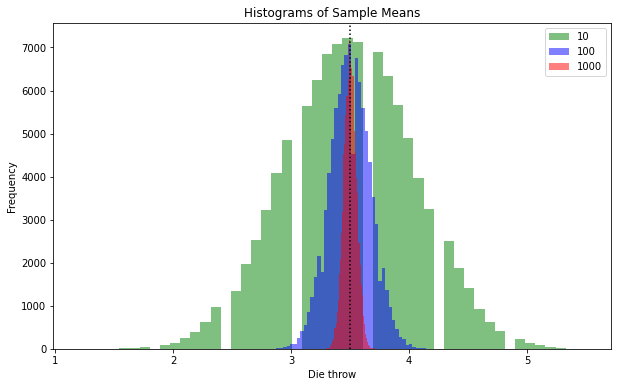

In [15]:
fig, ax = plt.subplots(1, 1)
plt.hist(sample_means[0][1], **kwargs, color='g', label='10')
plt.hist(sample_means[1][1], **kwargs, color='b', label='100')
plt.hist(sample_means[2][1], **kwargs, color='r', label='1000')
plt.vlines(3.5, 0, 1, transform=ax.get_xaxis_transform(), linestyles ="dotted", colors ="k")
plt.gca().set(title='Histograms of Sample Means', xlabel='Die throw', ylabel='Frequency')
plt.legend()
plt.show()

### Mean of an Exponential Distribution

The pictures start repeating and we get a very similar results with sampling the exponentally distributed wating time for the next mesenger message in our population. If you look closely howver you will see that the small sample size of 10 tends not to be centered arount the population mean of 4. The reason is that opposed to the uniform and the normal distribution the expoentential disribution is assymetric. We get a few very long wating times which distort our mean if we in one random experiment get one of them. In small samples these outliers distort the mean. In larger samples it is evened out and we look at a typical normal distribution for the means of our samples.

It is important to realized that these outlers are actually part of our data. Some people in our popilation were wating eg 40 minutes for the next message while the average wating time is only 4 minutes. So we are not dealing with wrong measurements. It still might be beneficial to eliminate these outliers however to get a more accurate picture of the actual mean when dealing with small samples. The ossue is harder to judge when we are unaware of the distribution in your population as opposed to knowing that we are dealing with an exponentatial distribution.

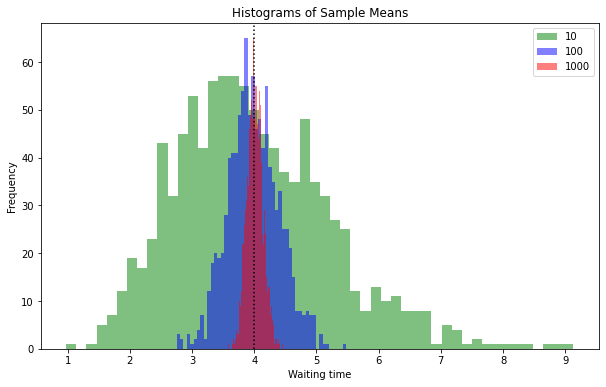

In [18]:
fig, ax = plt.subplots(1, 1)
plt.hist(sample_means[0][2], **kwargs, color='g', label='10')
plt.hist(sample_means[1][2], **kwargs, color='b', label='100')
plt.hist(sample_means[2][2], **kwargs, color='r', label='1000')
plt.vlines(4, 0, 1, transform=ax.get_xaxis_transform(), linestyles ="dotted", colors ="k")
plt.gca().set(title='Histograms of Sample Means', xlabel='Waiting time', ylabel='Frequency')
plt.legend()
plt.show()

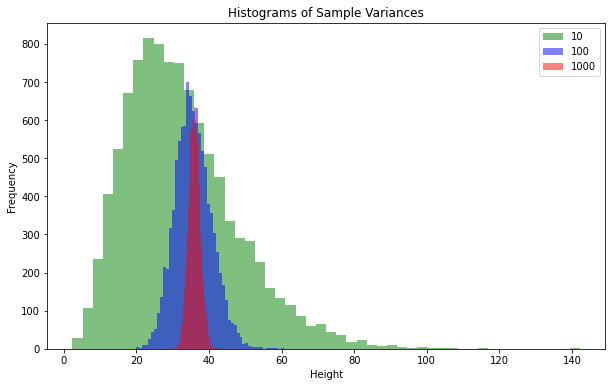

In [9]:
plt.close()
kwargs = dict(alpha=0.5, bins=50)
plt.hist(sample_variances[0][0], **kwargs, color='g', label='10')
plt.hist(sample_variances[1][0], **kwargs, color='b', label='100')
plt.hist(sample_variances[2][0], **kwargs, color='r', label='1000')
plt.gca().set(title='Histograms of Sample Variances', xlabel='Height', ylabel='Frequency')
plt.legend()
plt.show()

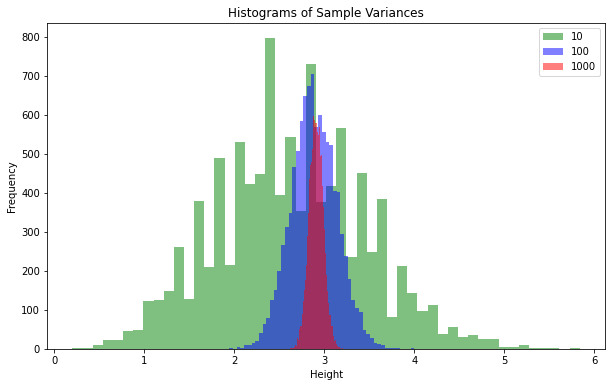

In [10]:
plt.close()
kwargs = dict(alpha=0.5, bins=50)
plt.hist(sample_variances[0][1], **kwargs, color='g', label='10')
plt.hist(sample_variances[1][1], **kwargs, color='b', label='100')
plt.hist(sample_variances[2][1], **kwargs, color='r', label='1000')
plt.gca().set(title='Histograms of Sample Variances', xlabel='Height', ylabel='Frequency')
plt.legend()
plt.show()

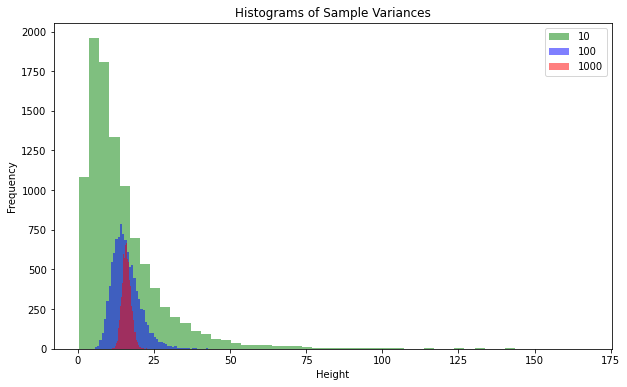

In [11]:
plt.close()
kwargs = dict(alpha=0.5, bins=50)
plt.hist(sample_variances[0][2], **kwargs, color='g', label='10')
plt.hist(sample_variances[1][2], **kwargs, color='b', label='100')
plt.hist(sample_variances[2][2], **kwargs, color='r', label='1000')
plt.gca().set(title='Histograms of Sample Variances', xlabel='Height', ylabel='Frequency')
plt.legend()
plt.show()

In [19]:
print("Sample Mean: %.10f / Sample Variance: %.10f" % 
      (np.mean(sample_normal), np.var(sample_normal, ddof=1)))

print(max(population_exp))

Sample Mean: 4.1091829940 / Sample Variance: 17.3260166258
51.797486123801164
